In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory("training_set", target_size=(64, 64), batch_size=32, class_mode='binary')
test_ds = test_datagen.flow_from_directory("test_set", target_size=(64, 64), batch_size=32, class_mode='binary')

# Build CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_ds, validation_data=test_ds, epochs=10)

# Save model
model.save("cat_dog_classifier.keras")



Found 8005 images belonging to 2 classes.
Found 426 images belonging to 2 classes.
Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 66s 247ms/step - accuracy: 0.9908 - loss: 0.0189 - val_accuracy: 1.0000 - val_loss: 2.1214e-18
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 68s 270ms/step - accuracy: 1.0000 - loss: 1.8666e-12 - val_accuracy: 1.0000 - val_loss: 2.1214e-18
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 238ms/step - accuracy: 1.0000 - loss: 2.6244e-12 - val_accuracy: 1.0000 - val_loss: 2.1213e-18
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 59s 236ms/step - accuracy: 1.0000 - loss: 1.1164e-11 - val_accuracy: 1.0000 - val_loss: 2.1209e-18
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 239ms/step - accuracy: 1.0000 - loss: 1.0062e-11 - val_accuracy: 1.0000 - val_loss: 2.1200e-18
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 64s 255ms/step - accuracy: 1.0000 - loss: 4.6066e-12 - val_accuracy: 1.0000 - val_loss: 2.1198e-18
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 64s 255ms/step - accuracy: 1.0000 - loss: 1.033

In [3]:
from tensorflow.keras.models import load_model

model = load_model("cat_dog_classifier.keras")



In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img_path = "cat-2.jpg"  # Replace with your image path
img = image.load_img(img_path, target_size=(64, 64))  # Match model input size

# Convert the image to a numpy array and expand dimensions
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize


In [9]:
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("It's a Dog!")
else:
    print("It's a Cat!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
It's a Dog!


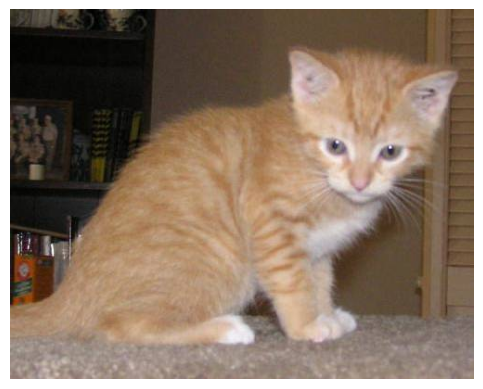

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming 'img_path' is defined as in your previous code

# Open the image using PIL
im = Image.open(img_path)

# Display the image using matplotlib
plt.imshow(im)
plt.axis('off') # Optional: Hide axis ticks and labels
plt.show()

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 76s 289ms/step - accuracy: 1.0000 - loss: 9.4486e-12 - val_accuracy: 1.0000 - val_loss: 2.1172e-18
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 64s 254ms/step - accuracy: 1.0000 - loss: 7.7002e-13 - val_accuracy: 1.0000 - val_loss: 2.1172e-18
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 64s 253ms/step - accuracy: 1.0000 - loss: 3.8864e-12 - val_accuracy: 1.0000 - val_loss: 2.1152e-18
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - accuracy: 1.0000 - loss: 5.7887e-13 - val_accuracy: 1.0000 - val_loss: 2.1147e-18
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 241ms/step - accuracy: 1.0000 - loss: 6.6425e-13 - val_accuracy: 1.0000 - val_loss: 2.1136e-18
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 238ms/step - accuracy: 1.0000 - loss: 1.0539e-12 - val_accuracy: 1.0000 - val_loss: 2.1135e-18
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 61s 244ms/step - accuracy: 1.0000 - loss: 1.2915e-12 - val_accuracy: 1.0000 - val_loss: 2.1125e-18
Epoch 8/10
251/251 ━━━━━━━━

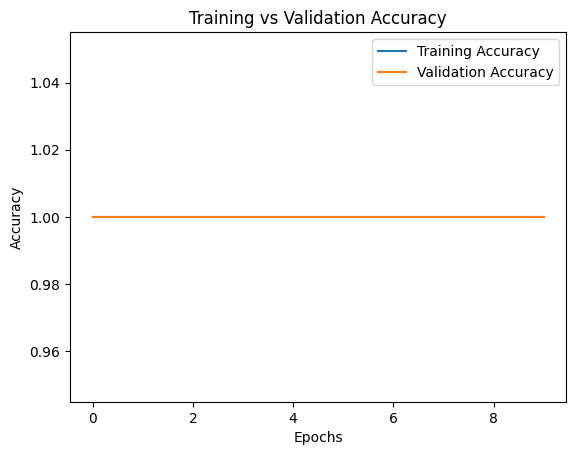

In [10]:
import matplotlib.pyplot as plt

# Train the model and save history
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

# Plot Accuracy Graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
